In [0]:
import tensorflow as tf
import os
import imageio

In [0]:
import zipfile
with zipfile.ZipFile("/content/BelgiumTSC_Testing.zip","r") as zip_ref:
    zip_ref.extractall("/content/TrafficSigns")

with zipfile.ZipFile("/content/BelgiumTSC_Training.zip","r") as zip_ref:
    zip_ref.extractall("/content/TrafficSigns")

In [0]:
def load_data(data_directory):
  directories = [d for d in os.listdir(data_directory)
                        if os.path.isdir(os.path.join(data_directory, d))]
  
  labels = []
  images = []
  
  for d in directories:
      label_directory = os.path.join(data_directory, d)
      file_names = [os.path.join(label_directory, f) 
                    for f in os.listdir(label_directory) 
                    if f.endswith(".ppm")]
      for f in file_names:
          images.append(imageio.imread(f))
          labels.append(int(d)) 
  return images, labels

In [0]:
ROOT_PATH = "/content"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

In [0]:
images, labels = load_data(train_data_directory)

In [15]:
#Data Inspection
#Convert list to np array 

import numpy as np
images = np.array(images)
labels = np.array(labels)
print(images.size)
print("Number of unique classes: ", np.unique(labels).size)

(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies = sorted(frequencies,key=lambda x: x[1] , reverse = True)[:5]
print("Top 5 frequent labels: ", frequencies)

4575
Number of unique classes:  62
Top 5 frequent labels:  [array([ 22, 375]), array([ 32, 316]), array([ 38, 285]), array([ 61, 282]), array([ 40, 242])]


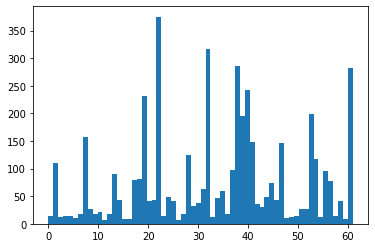

In [16]:
#Label analysis
import matplotlib.pyplot as plt

plt.hist(labels , 62)
plt.show()

In [0]:
#function for plotting 4 random images:
import random

def plotting_Images(imagesData , cmap_val):
  traffic_signs = random.sample(range(1, 4575), 4)

  for i in range(len(traffic_signs)):
      plt.subplot(1, 4, i+1)
      plt.axis('off')
      plt.imshow(imagesData[traffic_signs[i]] , cmap = cmap_val)
      plt.subplots_adjust(wspace=0.5)
      plt.show()
      print("shape: {0}, min: {1}, max: {2}".format(imagesData[traffic_signs[i]].shape, 
                                                    imagesData[traffic_signs[i]].min(), 
                                                    imagesData[traffic_signs[i]].max()))

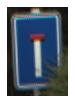

shape: (98, 67, 3), min: 5, max: 227


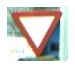

shape: (62, 70, 3), min: 6, max: 255


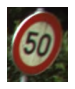

shape: (105, 85, 3), min: 3, max: 255


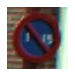

shape: (54, 53, 3), min: 1, max: 255


In [18]:
#Visualizing images data
plotting_Images(images , cmap_val = 'viridis' )

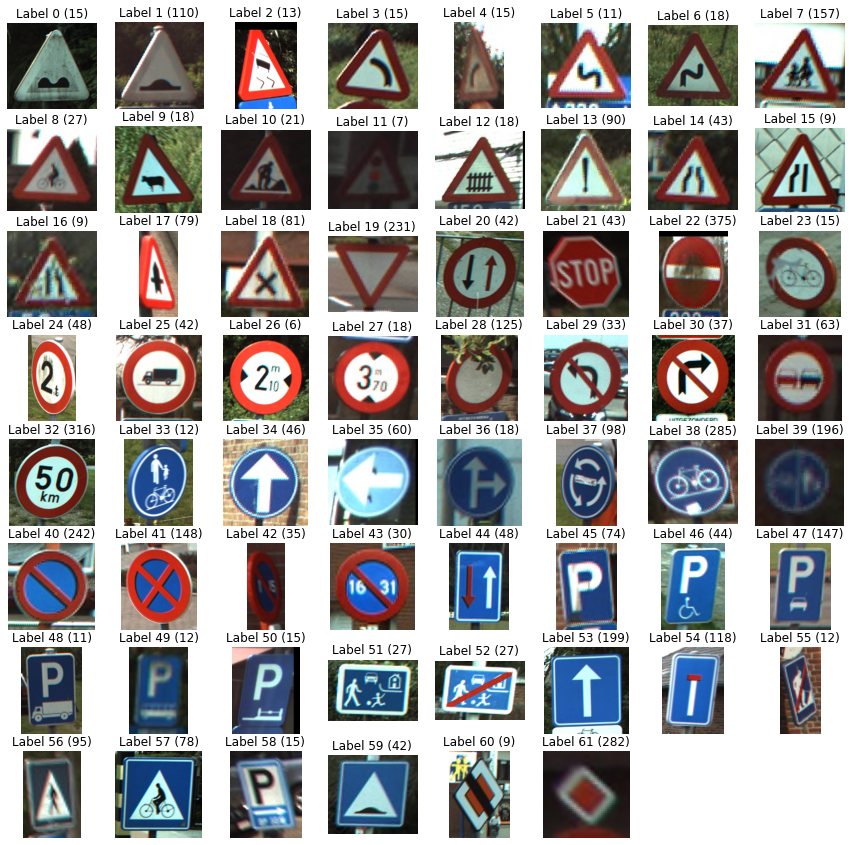

In [19]:
#Plot of all unique signs in the labels:

labels = list(labels)
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt 

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [21]:
images28 = np.array(images28)
images28.shape

(4575, 28, 28, 3)

In [22]:
images28[0].shape

(28, 28, 3)

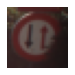

shape: (28, 28, 3), min: 0.07058823529411765, max: 0.6271008403361348


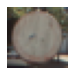

shape: (28, 28, 3), min: 0.08319327731092353, max: 0.8537815126050423


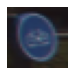

shape: (28, 28, 3), min: 0.07058823529411765, max: 0.5718137254901963


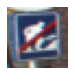

shape: (28, 28, 3), min: 0.09803921568627451, max: 0.9882352941176469


In [23]:
#Plots after rescaling Images
plotting_Images(images28, cmap_val = 'viridis')

In [24]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to grayscale
images28 = rgb2gray(images28)
print(images28[0].shape)

(28, 28)


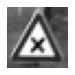

shape: (28, 28), min: 0.0905602521008399, max: 0.9949262184873949


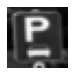

shape: (28, 28), min: 0.11197331932773102, max: 0.7688525210084034


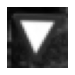

shape: (28, 28), min: 0.08443663865546219, max: 0.982276423944578


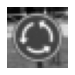

shape: (28, 28), min: 0.060728578431372554, max: 0.7259244427771107


In [25]:
#Gray scale images for classification
plotting_Images(images28, cmap_val = 'gray')

In [0]:
#pip install tensorflow==1.15

In [0]:
#Neural Network Model for training:

# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

In [0]:
# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

In [0]:
# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

In [0]:
# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))

In [0]:
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [0]:
# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

In [0]:
# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [33]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected_1/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_1:0", shape=(?,), dtype=int64)


In [34]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 

Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_2:0", shape

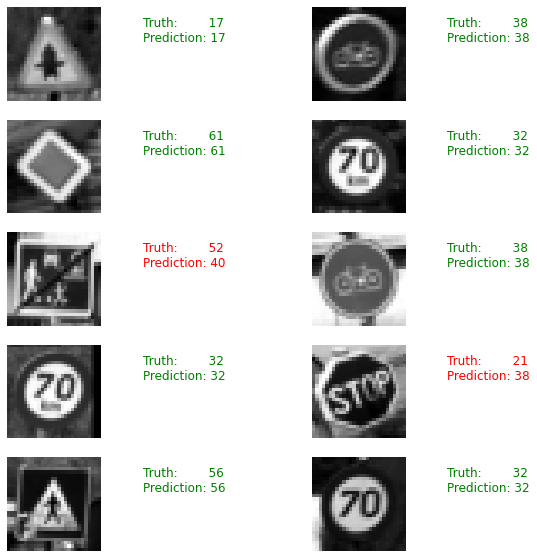

Accuracy: 0.633


In [47]:
  tf.set_random_seed(1234)

  with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      for i in range(201):
          _, loss_value = sess.run([train_op, loss], feed_dict={x: images28, y: labels})
          if i % 10 == 0:
              print("Loss: ", loss)


      # Import `matplotlib`
      import matplotlib.pyplot as plt
      import random

      # Pick 10 random images
      sample_indexes = random.sample(range(len(images28)), 10)
      sample_images = [images28[i] for i in sample_indexes]
      sample_labels = [labels[i] for i in sample_indexes]

      # Run the "correct_pred" operation
      predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                              
      # Print the real and predicted labels
      print(sample_labels)
      print(predicted)

      # Display the predictions and the ground truth visually.
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(sample_images)):
          truth = sample_labels[i]
          prediction = predicted[i]
          plt.subplot(5, 2,1+i)
          plt.axis('off')
          color='green' if truth == prediction else 'red'
          plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
                  fontsize=12, color=color)
          plt.imshow(sample_images[i],  cmap="gray")

      plt.show()



      #Testing on Test images
            #Testing on test images: 

      # Import `skimage`
      from skimage import transform

      # Load the test data
      test_images, test_labels = load_data(test_data_directory)

      # Transform the images to 28 by 28 pixels
      test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

      # Convert to grayscale
      from skimage.color import rgb2gray
      test_images28 = rgb2gray(np.array(test_images28))

      # Run predictions against the full test set.
      predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

      # Calculate correct matches 
      match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

      # Calculate the accuracy
      accuracy = match_count / len(test_labels)

      # Print the accuracy
      print("Accuracy: {:.3f}".format(accuracy))
  
  sess.close()

In [0]:
s